# 1. Import and Install Dependencies

In [1]:
! pip install tensorflow opencv-python mediapipe matplotlib

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [3]:
! pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Users/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(t

In [4]:
! install opencv-python matplotlib mediapipe cv2


usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1724853315.972733  331664 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1724853316.127876  331970 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724853316.137023  331969 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724853316.138592  331971 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724853316.138619  331973 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724853316.139395  331969 inference_feedback_manager.cc:114] Feedback manager requires a model

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

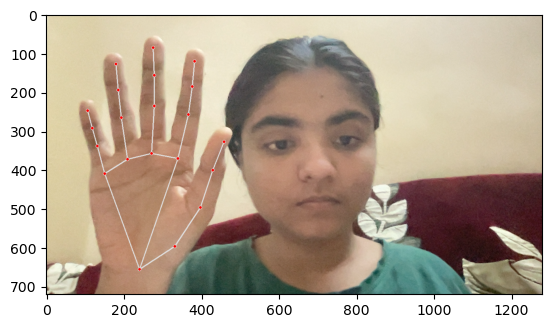

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/Users/shriya/Downloads/keypoints_sih/islrtc_shriya') 

# Actions that we try to detect
actions = np.array(['ajivit', 'anta_pranali', 'antagrahan','aterna','understory'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
import os
import cv2

# Paths
DATASET_PATH = '/Users/shriya/Desktop/video_train'  # Replace with the path to your dataset containing folders with videos
OUTPUT_PATH = '/Users/shriya/Downloads/ex_data_frames/islrtc_shriya'
# Loop through each folder (each containing one video)
for action in os.listdir(DATASET_PATH):
    action_path = os.path.join(DATASET_PATH, action)
    
    # Check if the current item is a directory, and skip if it's not
    if not os.path.isdir(action_path):
        continue
    
    video_files = [f for f in os.listdir(action_path) if f.lower().endswith(('.mp4', '.avi', '.mov'))]

    for video_file in video_files:
        video_path = os.path.join(action_path, video_file)
        cap = cv2.VideoCapture(video_path)
        
        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Create a directory for frames if it doesn't exist
            frames_path = os.path.join(OUTPUT_PATH, action)
            os.makedirs(frames_path, exist_ok=True)

            # Save the frame
            frame_filename = os.path.join(frames_path, f'frame_{frame_count:04d}.jpg')
            cv2.imwrite(frame_filename, frame)
            frame_count += 1

        cap.release()

print("Frames extraction complete.")


Frames extraction complete.


In [25]:
import os
import cv2


FRAMES_PATH = '/Users/shriya/Downloads/ex_data_frames/islrtc_shriya' 
PROCESSED_FRAMES_PATH = '/Users/shriya/Downloads/processed_frames'  

for action in os.listdir(FRAMES_PATH):
    action_frames_path = os.path.join(FRAMES_PATH, action)
    
    if not os.path.isdir(action_frames_path):
        continue

    frames = sorted([f for f in os.listdir(action_frames_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    
   
    processed_action_path = os.path.join(PROCESSED_FRAMES_PATH, action)
    os.makedirs(processed_action_path, exist_ok=True)
    
    for frame in frames:
        frame_path = os.path.join(action_frames_path, frame)
        
      
        img = cv2.imread(frame_path)
        if img is None:
            print(f"Warning: {frame_path} could not be read.")
            continue
        
        processed_img = cv2.resize(img, (224, 224))
        
       
        processed_frame_path = os.path.join(processed_action_path, frame)
        cv2.imwrite(processed_frame_path, processed_img)

print("Processing complete.")


Processing complete.


In [26]:
import os
import numpy as np
import cv2

# Paths
PROCESSED_FRAMES_PATH = '/Users/shriya/Downloads/processed_frames'
actions = ['ajivit', 'anta_pranali', 'antagrahan', 'aterna', 'understory']
sequence_length = 30
img_height, img_width = 224, 224 

def load_images_from_folder(folder, sequence_length):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))  # Resize images
            images.append(img)
    return images

def create_sequences_from_images(images, sequence_length):
    sequences = []
    for i in range(0, len(images) - sequence_length + 1, sequence_length):
        sequence = images[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

X, y = [], []

for action in actions:
    action_path = os.path.join(PROCESSED_FRAMES_PATH, action)
    images = load_images_from_folder(action_path, sequence_length)
    sequences = create_sequences_from_images(images, sequence_length)
    X.extend(sequences)
    y.extend([actions.index(action)] * len(sequences))

X = np.array(X)
y = np.array(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(actions))

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (74, 30, 224, 224, 3)
y shape: (74, 5)


: 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')



In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.optimizers import SGD


# Compile Optimizer - SGD

In [ ]:
COMPILE_OPTIMIZER = SGD(learning_rate=0.01, momentum=0.9)
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 5

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3, mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    filepath="./modelcheck.weights.h5"
)


# # CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, BatchNormalization

model = Sequential()

# TimeDistributed layer to apply Conv2D to each frame
model.add(TimeDistributed(Conv2D(24, (3, 3), activation='relu', padding='same'), input_shape=(30, 224, 224, 3)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=2)))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=2)))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=2)))

model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=2)))

model.add(TimeDistributed(Conv2D(256, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=2)))

# Flatten the output from TimeDistributed layers
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(OUTPUT_DIM, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])



/Users/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (62, 30, 224, 224, 3)
X_test shape: (12, 30, 224, 224, 3)


: 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=5, mode='min')
]

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=31,  
    callbacks=callbacks
)

KeyboardInterrupt: 

svc

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU, BatchNormalization, Input, Conv2D, Flatten

def build_generator(latent_dim):
    model = Sequential()

    # Fully connected layer
    model.add(Dense(128 * 56 * 56, activation="relu", input_dim=latent_dim))
    model.add(Reshape((56, 56, 128)))

    # Upsample to 112x112
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 224x224
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    # Output layer
    model.add(Conv2D(3, (7, 7), activation='tanh', padding='same'))

    return model

latent_dim = 100  # Dimensionality of the noise input
generator = build_generator(latent_dim)
generator.summary()


In [ ]:
def build_discriminator(input_shape=(224, 224, 3)):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(512, (3, 3), strides=(2, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator()
discriminator.summary()
discriminator.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import Model

def build_gan(generator, discriminator):
    discriminator.trainable = False  # 

    gan_input = Input(shape=(latent_dim,))
    img = generator(gan_input)
    gan_output = discriminator(img)

    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='SGD', loss='binary_crossentropy')
    return gan

gan = build_gan(generator, discriminator)
gan.summary()
